In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

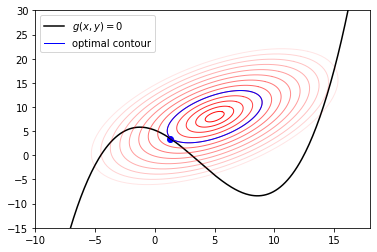

In [3]:
c_x = 5
c_y = 8

def ellipse(r):
    N = 100
    a = 2*r
    b = 1*r
    theta0 = np.pi / 3
    theta = np.arange(0, 2*np.pi*(1+1/N), 2*np.pi/N)
    # 円を作成
    x = np.cos(theta)
    y = np.sin(theta)
    # 楕円に変換
    x = x*a
    y = y*b
    # 傾ける
    x, y = x*np.cos(theta0)-y*np.sin(theta0), x*np.sin(theta0)+y*np.cos(theta0)
    # 平行移動
    x = x + c_x
    y = y + c_y
    return x, y

def plot_ellipse(r, color, alpha=1, label=''):
    x, y = ellipse(r)
    if label == '':
        plt.plot(x, y, color=color, linewidth=1, alpha=alpha)
    else:
        plt.plot(x, y, color=color, linewidth=1, alpha=alpha, label=label)

def cubic_func(shift_x=0, shift_y=0):
    x = np.arange(c_x-20, c_x+20, 0.1)
    y = 0.03*(x-c_x+10)*(x-c_x+1)*(x-c_x-7) + c_y-10
    x, y = x+shift_x, y+shift_y
    return x, y

def plot_cubic_func(shift_x=0, shift_y=0):
    x, y = cubic_func(shift_x, shift_y)
    plt.plot(x, y, label='$g(x, y) = 0$', color='black')

alpha = np.arange(0.1, 1, 0.07)[::-1]
r = [(i+1)*0.6 for i in range(len(alpha))]
plt.xlim([-10, 18])
plt.ylim([-15, 30])
plot_cubic_func()
for i in range(len(alpha)):
    plot_ellipse(r[i], 'r', alpha=alpha[i])
plot_ellipse(r[4], 'b', label='optimal contour')
plt.scatter(1.3, 3.3, color='b')
plt.legend()
plt.show()

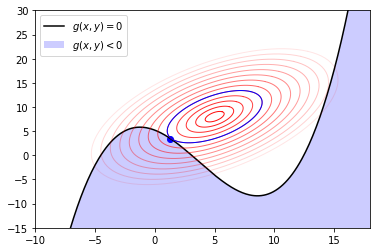

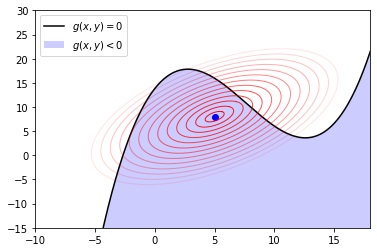

In [4]:
def fill_cubic_func(shift_x=0, shift_y=0):
    x, y = cubic_func(shift_x, shift_y)
    plt.fill_between(x, np.full(len(x), -20), y, facecolor='b', alpha=0.2, label='$g(x, y) < 0$')

def draw_graph(opt_x, opt_y, shift_x=0, shift_y=0):
    alpha = np.arange(0.1, 1, 0.07)[::-1]
    r = [(i+1)*0.6 for i in range(len(alpha))]
    plt.xlim([-10, 18])
    plt.ylim([-15, 30])
    plot_cubic_func(shift_x, shift_y)
    fill_cubic_func(shift_x, shift_y)
    for i in range(len(alpha)):
        plot_ellipse(r[i], 'r', alpha=alpha[i])
    plt.scatter(opt_x, opt_y, color='b')

draw_graph(1.3, 3.3)
plot_ellipse(r[4], 'b', label='')
plt.legend()
plt.show()

#draw_graph(4, 4)
draw_graph(c_x, c_y, 4, 12)
plt.legend()
plt.show()

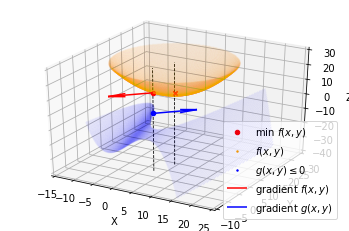

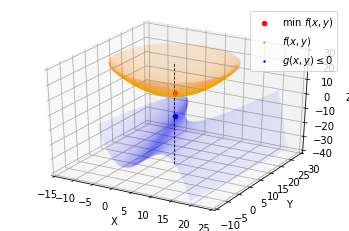

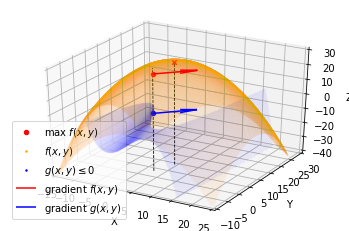

In [15]:
def f(x_, y_):
    return 0.1*((x-5)**2 + (y-8)**2)+10

def f2(x_, y_):
    return z_max - 0.1*((x-5)**2 + (y-8)**2)




from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np

x_min = -15
x_max = 25
y_min = -10
y_max = 30
z_min = -40
z_max = 30

fig = plt.figure() #プロット領域の作成
ax = fig.gca(projection='3d') #プロット中の軸の取得。gca は"Get Current Axes" の略。

x = np.arange(x_min, x_max, 0.1) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(y_min, y_max, 0.1)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
z = y - 0.03*(x+5)*(x-4)*(x-12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

x2 = []
y2 = []
z2 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= 0:
            x2.append(x__)
            y2.append(y__)
            z2.append(z__)
x2, y2, z2 = np.array(x2), np.array(y2), np.array(z2)
ax.scatter(x2, y2, z2, s=0.01, c='blue', alpha=0.1)

z = f(x, y)
x3 = []
y3 = []
z3 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= z_max:
            x3.append(x__)
            y3.append(y__)
            z3.append(z__)
x3, y3, z3 = np.array(x3), np.array(y3), np.array(z3)
ax.scatter(x3, y3, z3, s=0.01, c='orange', alpha=0.1)
ax.scatter(5, 8, 10, c='red', marker='x')
ax.plot([5,5], [8, 8], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')
ax.scatter(3, 2.16, 13.81, c='red', label='min $f(x, y)$')
ax.scatter(3, 2.16, 0, c='blue')
ax.plot([3,3], [2.16, 2.16], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')

# ダミープロット
ax.scatter([], [], c='orange', s=2, label='$f(x, y)$')
ax.scatter([], [], c='blue', s=2, label='$g(x, y) \leq 0$')

ax.quiver(3, 2.16, 13.81, -7, -7, 0, color='red', label='gradient $f(x, y)$', arrow_length_ratio=0.4)
ax.quiver(3, 2.16, 0, 7, 7, 0, color='blue', label='gradient $g(x, y)$', arrow_length_ratio=0.4)

plt.legend()
plt.show()






from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np

x_min = -15
x_max = 25
y_min = -10
y_max = 30
z_min = -40
z_max = 30

fig = plt.figure() #プロット領域の作成
ax = fig.gca(projection='3d') #プロット中の軸の取得。gca は"Get Current Axes" の略。

x = np.arange(x_min, x_max, 0.1) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(y_min, y_max, 0.1)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
z = y - 0.03*(x-4+5)*(x-4-4)*(x-4-12) - 8
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

x2 = []
y2 = []
z2 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= 0:
            x2.append(x__)
            y2.append(y__)
            z2.append(z__)
x2, y2, z2 = np.array(x2), np.array(y2), np.array(z2)
ax.scatter(x2, y2, z2, s=0.01, c='blue', alpha=0.1)

z = 0.1*((x-5)**2 + (y-8)**2)+10
x3 = []
y3 = []
z3 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= z_max:
            x3.append(x__)
            y3.append(y__)
            z3.append(z__)
x3, y3, z3 = np.array(x3), np.array(y3), np.array(z3)
ax.scatter(x3, y3, z3, s=0.01, c='orange', alpha=0.1)
ax.scatter(5, 8, 10, c='red', label='min $f(x, y)$')
ax.plot([5,5], [8, 8], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')
ax.scatter(5, 8, -5.94, c='blue')

# ダミープロット
ax.scatter([], [], c='orange', s=2, label='$f(x, y)$')
ax.scatter([], [], c='blue', s=2, label='$g(x, y) \leq 0$')

plt.legend()
plt.show()







from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np

x_min = -15
x_max = 25
y_min = -10
y_max = 30
z_min = -40
z_max = 30

fig = plt.figure() #プロット領域の作成
ax = fig.gca(projection='3d') #プロット中の軸の取得。gca は"Get Current Axes" の略。

x = np.arange(x_min, x_max, 0.1) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(y_min, y_max, 0.1)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
z = y - 0.03*(x+5)*(x-4)*(x-12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

x2 = []
y2 = []
z2 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= 0:
            x2.append(x__)
            y2.append(y__)
            z2.append(z__)
x2, y2, z2 = np.array(x2), np.array(y2), np.array(z2)
ax.scatter(x2, y2, z2, s=0.01, c='blue', alpha=0.1)


z = f2(x, y)
x3 = []
y3 = []
z3 = []
for x_, y_, z_ in zip(x, y, z):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= z_max:
            x3.append(x__)
            y3.append(y__)
            z3.append(z__)
x3, y3, z3 = np.array(x3), np.array(y3), np.array(z3)
ax.scatter(x3, y3, z3, s=0.01, c='orange', alpha=0.1)
ax.scatter(5, 8, z_max, c='red', marker='x')
ax.plot([5,5], [8, 8], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')
ax.scatter(3, 2.16, z_max-3.81, c='red', label='max $f(x, y)$')
ax.scatter(3, 2.16, 0, c='blue')
ax.plot([3,3], [2.16, 2.16], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')

# ダミープロット
ax.scatter([], [], c='orange', s=2, label='$f(x, y)$')
ax.scatter([], [], c='blue', s=2, label='$g(x, y) \leq 0$')

ax.quiver(3, 2.16, z_max-3.81, 7, 7, 0, color='red', label='gradient $f(x, y)$', arrow_length_ratio=0.4)
ax.quiver(3, 2.16, 0, 7, 7, 0, color='blue', label='gradient $g(x, y)$', arrow_length_ratio=0.4)

plt.legend()
plt.show()

[x, y, f_min] = [1.1999999999999424, 5.624640000000094, 11.00411675648]


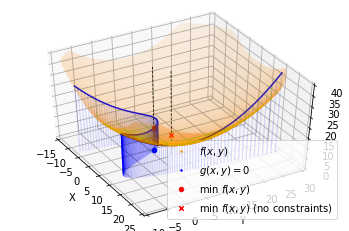

[x, y, f_max] = [1.1999999999999424, 5.624640000000094, 38.99588324352]


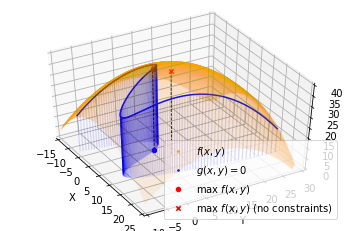

In [14]:
def g(x_, y_):
    return y_ - gy(x_)

def f(x_, y_):
    return 0.05*((x_-5)**2 + (y_-8)**2)+10

def gy(x_):
    return 0.03*(x_+5)*(x_-4)*(x_-12)

def f2(x_, y_):
    return z_max - 0.05*((x_-5)**2 + (y_-8)**2)

#def func():
#    x = arange(x_min, y_min)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np

x_min = -15
x_max = 25
y_min = -10
y_max = 30
z_min = 0
z_max = 40




fig = plt.figure() #プロット領域の作成
ax = fig.gca(projection='3d') #プロット中の軸の取得。gca は"Get Current Axes" の略。

x = np.arange(x_min, x_max, 0.1) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(y_min, y_max, 0.1)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
zg = g(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# f(x, y) をプロット
zf = f(x, y)
x3 = []
y3 = []
z3 = []
for x_, y_, z_ in zip(x, y, zf):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= z_max:
            x3.append(x__)
            y3.append(y__)
            z3.append(z__)
x3, y3, z3 = np.array(x3), np.array(y3), np.array(z3)
ax.scatter(x3, y3, z3, s=0.01, c='orange', alpha=0.1)
ax.plot([5,5], [8, 8], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')
#ax.scatter(3, 2.16, f(3, 2.16), c='red', label='min $f(x, y)$')
#ax.scatter(3, 2.16, z_min, c='blue')
#ax.plot([3,3], [2.16, 2.16], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')

# 凡例のためのダミープロット
ax.scatter([], [], c='orange', s=2, label='$f(x, y)$')
ax.scatter([], [], c='blue', s=2, label='$g(x, y) = 0$')

# g(x, y) = 0 のカベをプロット
xg = np.arange(x_min, x_max, 0.1)
yg = gy(xg)
xg_plot = []
yg_plot = []
zg_plot = []
x_line = []
y_line = []
z_line = []
xyz_minf = [None, None, None]
xyz_maxf = [None, None, None]
for x_, y_ in zip(xg, yg):
    if x_min <= x_ <= x_max and y_min <= y_ <= y_max:
        z_top_ = f(x_, y_)
        x_line.append(x_)
        y_line.append(y_)
        z_line.append(z_top_)
        if xyz_maxf[2] is None or z_top_ > xyz_maxf[2]:
            xyz_maxf = [x_, y_, z_top_]
        if xyz_minf[2] is None or z_top_ < xyz_minf[2]:
            xyz_minf = [x_, y_, z_top_]
        for z_ in np.arange(z_min, z_top_, 0.1):
            if z_min <= z_ <= z_max:
                xg_plot.append(x_)
                yg_plot.append(y_)
                zg_plot.append(z_)
ax.scatter(xg_plot, yg_plot, zg_plot, s=0.01, c='blue', alpha=0.1)
ax.plot(x_line, y_line, z_line, c='blue')
print('[x, y, f_min] = {}'.format(xyz_minf))
ax.scatter(xyz_minf[0], xyz_minf[1], xyz_minf[2], c='red', label='min $f(x, y)$')
ax.scatter(5, 8, f(5, 8), c='red', marker='x', label='min $f(x, y)$ (no constraints)')
ax.scatter(xyz_minf[0], xyz_minf[1], z_min, c='blue')
ax.plot([xyz_minf[0], xyz_minf[0]], [xyz_minf[1], xyz_minf[1]], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')

ax.view_init(elev=45, azim=-30)
plt.legend()
plt.show()









fig = plt.figure() #プロット領域の作成
ax = fig.gca(projection='3d') #プロット中の軸の取得。gca は"Get Current Axes" の略。

x = np.arange(x_min, x_max, 0.1) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(y_min, y_max, 0.1)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成
z = g(x, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

# f(x, y) をプロット
zf = f2(x, y)
x3 = []
y3 = []
z3 = []
for x_, y_, z_ in zip(x, y, zf):
    for x__, y__, z__ in zip(x_, y_, z_):
        if z_min <= z__ <= z_max:
            x3.append(x__)
            y3.append(y__)
            z3.append(z__)
x3, y3, z3 = np.array(x3), np.array(y3), np.array(z3)
ax.scatter(x3, y3, z3, s=0.01, c='orange', alpha=0.1)
ax.plot([5,5], [8, 8], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')
#ax.scatter(3, 2.16, f2(3, 2.16), c='red', label='max $f(x, y)$')
#ax.scatter(3, 2.16, z_min, c='blue')
#ax.plot([3,3], [2.16, 2.16], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')

# 凡例のためのダミープロット
ax.scatter([], [], c='orange', s=2, label='$f(x, y)$')
ax.scatter([], [], c='blue', s=2, label='$g(x, y) = 0$')

# g(x, y) = 0 のカベをプロット
xg = np.arange(x_min, x_max, 0.1)
yg = gy(xg)
xg_plot = []
yg_plot = []
zg_plot = []
x_line = []
y_line = []
z_line = []
xyz_minf = [None, None, None]
xyz_maxf = [None, None, None]
for x_, y_ in zip(xg, yg):
    if x_min <= x_ <= x_max and y_min <= y_ <= y_max:
        z_top_ = f2(x_, y_)
        x_line.append(x_)
        y_line.append(y_)
        z_line.append(z_top_)
        if xyz_maxf[2] is None or z_top_ > xyz_maxf[2]:
            xyz_maxf = [x_, y_, z_top_]
        if xyz_minf[2] is None or z_top_ < xyz_minf[2]:
            xyz_minf = [x_, y_, z_top_]
        for z_ in np.arange(z_min, z_top_, 0.1):
            if z_min <= z_ <= z_max:
                xg_plot.append(x_)
                yg_plot.append(y_)
                zg_plot.append(z_)
ax.scatter(xg_plot, yg_plot, zg_plot, s=0.01, c='blue', alpha=0.1)
ax.plot(x_line, y_line, z_line, c='blue')
print('[x, y, f_max] = {}'.format(xyz_maxf))
ax.scatter(xyz_maxf[0], xyz_maxf[1], xyz_maxf[2], c='red', label='max $f(x, y)$')
ax.scatter(5, 8, f2(5, 8), c='red', marker='x', label='max $f(x, y)$ (no constraints)')
ax.scatter(xyz_maxf[0], xyz_maxf[1], z_min, c='blue')
ax.plot([xyz_maxf[0], xyz_maxf[0]], [xyz_maxf[1], xyz_maxf[1]], [z_min, z_max], linestyle='dashed', linewidth=0.8, c='black')


ax.view_init(elev=45, azim=-30)
plt.legend()
plt.show()

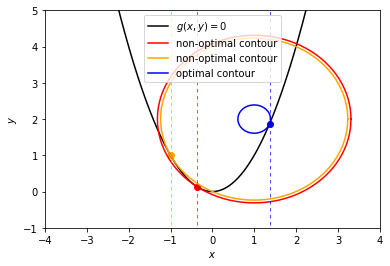

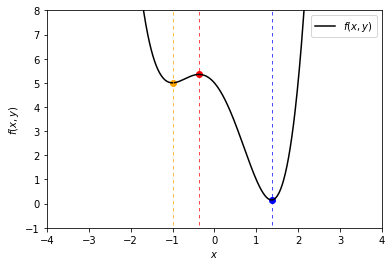

In [197]:
c_x = 1
c_y = 2

def circle(r_):
    N = 100
    theta_ = np.arange(0, 2*np.pi*(1+1/N), 2*np.pi/N)
    # 円を作成
    x_ = r_ * np.cos(theta_) + c_x
    y_ = r_ * np.sin(theta_) + c_y
    return x_, y_

def quadratic_func():
    x = np.arange(-3, 3, 0.01)
    y = x * x
    return x, y

x_tangency = [(1-np.sqrt(3))/2, -1, (1+np.sqrt(3))/2]
y_tangency = [(2-np.sqrt(3))/2, 1, (2+np.sqrt(3))/2]
colors = ['red', 'orange', 'blue']
labels = ['non-optimal contour', 'non-optimal contour', 'optimal contour']

def draw_vline():
    for i in range(len(x_tangency)):
        plt.plot([x_tangency[i], x_tangency[i]], [-10, 10], c=colors[i], linewidth=0.7, linestyle=(0, (5, 5)))
        #plt.scatter(x_tangency[i], f(x_tangency[i], y_tangency[i]), c=colors[i])

def scatter_tangency():
    for i in range(len(x_tangency)):
        #plt.plot([x_tangency[i], x_tangency[i]], [-10, 10], c=colors[i], linewidth=0.7, linestyle=(0, (5, 5)))
        plt.scatter(x_tangency[i], f(x_tangency[i], y_tangency[i]), c=colors[i])

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([-4, 4])
plt.ylim([-1, 5])
x, y = quadratic_func()
plt.plot(x, y, label='$g(x, y) = 0$', c='black')
for i in range(len(x_tangency)):
    r = np.sqrt((x_tangency[i]-c_x)**2 + (y_tangency[i]-c_y)**2)
    x_, y_ = circle(r)
    plt.plot(x_, y_, label=labels[i], c=colors[i])
    plt.scatter(x_tangency[i], y_tangency[i], c=colors[i])
draw_vline()
plt.legend()
plt.show()

def f(x_, y_):
    return (x_-1)**2 + (y_-2)**2
f_value = [f(x[0], y[0])]
for i in range(1, len(x)):
    dl = np.sqrt((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2)
    f_value.append(f(x[i], y[i]))
plt.xlabel('$x$')
plt.ylabel('$f(x, y)$')
plt.xlim([-4, 4])
plt.ylim([-1, 8])
plt.plot(x, f_value, label='$f(x, y)$', c='black')
draw_vline()
scatter_tangency()

plt.legend()
plt.show()

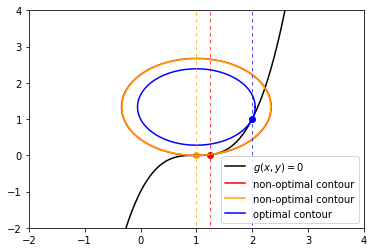

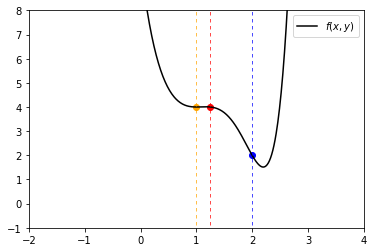

In [198]:
c_x = 1
c_y = 4/3

def plot_circle_2(r, label, color):
    N = 100
    theta = np.arange(0, 2*np.pi*(1+1/N), 2*np.pi/N)
    # 円を作成
    x = r * np.cos(theta) + c_x
    y = r * np.sin(theta) + c_y
    plt.plot(x, y, label=label, c=color)

def cubic_func_2():
    x = np.arange(-3, 3, 0.01)
    y = (x - 1)**3
    return x, y

x_tangency = [1.2530765865416, 1, 2]
y_tangency = [(x_-1)**3 for x_ in x_tangency]
colors = ['red', 'orange', 'blue']
labels = ['non-optimal contour', 'non-optimal contour', 'optimal contour']

plt.xlim([-2, 4])
plt.ylim([-2, 4])
x, y = cubic_func_2()
plt.plot(x, y, label='$g(x, y) = 0$', c='black')
#plot_cubic_func_2(, 'black')
for i in range(len(x_tangency)):
    r = np.sqrt((x_tangency[i]-c_x)**2 + (y_tangency[i]-c_y)**2)
    plot_circle_2(r, labels[i], colors[i])
    plt.scatter(x_tangency[i], y_tangency[i], c=colors[i])
draw_vline()
plt.legend()
plt.show()


def f(x_, y_):
    return (x_-1)**2 + (y_-2)**2
f_value = [f(x[0], y[0])]
for i in range(1, len(x)):
    dl = np.sqrt((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2)
    f_value.append(f(x[i], y[i]))
plt.xlim([-2, 4])
plt.ylim([-1, 8])
plt.plot(x, f_value, label='$f(x, y)$', c='black')
draw_vline()
scatter_tangency()

plt.legend()
plt.show()